<h1 style='text-align:center; font-weight: bold'>
    Decision Tree Classification
</h1>

## **Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

In [3]:
from datetime import datetime, timedelta
import winsound

In [131]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

## **Datos**

In [87]:
titanic_train = pd.read_csv('Datos/Crudos/titanic-train.csv')
titanic_test = pd.read_csv('Datos/Crudos/titanic-test.csv')

## **EDA**

In [11]:
titanic_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.50,NaN,S
539,540,1,1,"Frolicher, Miss. Hedwig Margaritha",female,22.0,0,2,13568,49.50,B39,C
696,697,0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.05,NaN,S


In [14]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
titanic_train.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C


In [44]:
variables = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp']

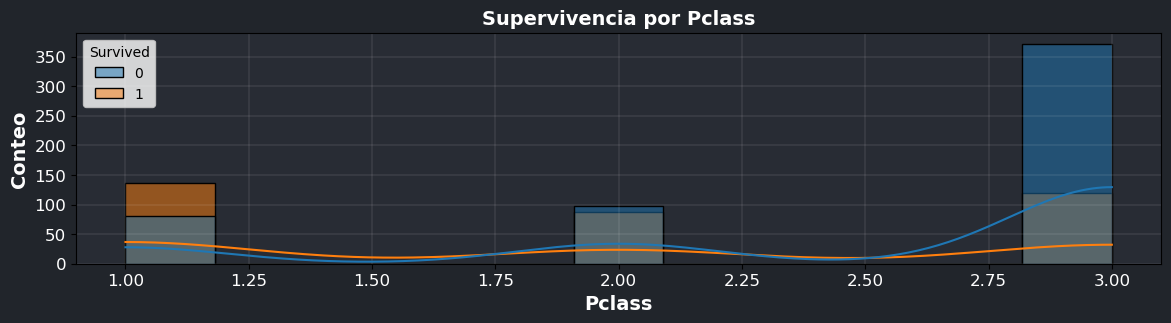

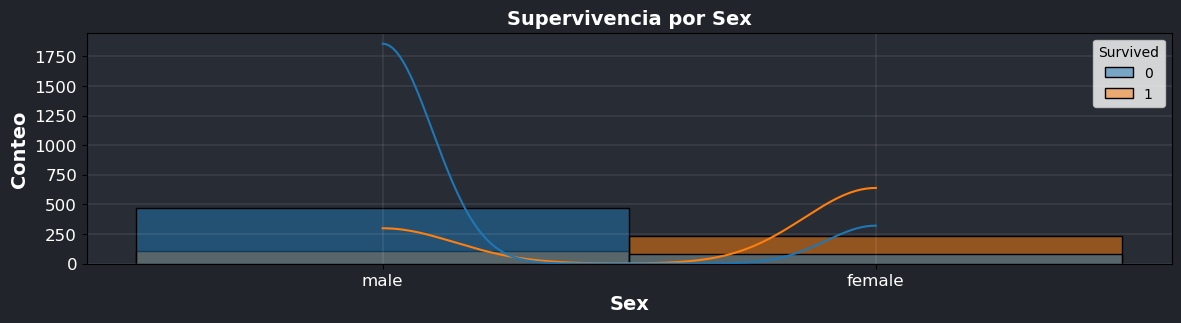

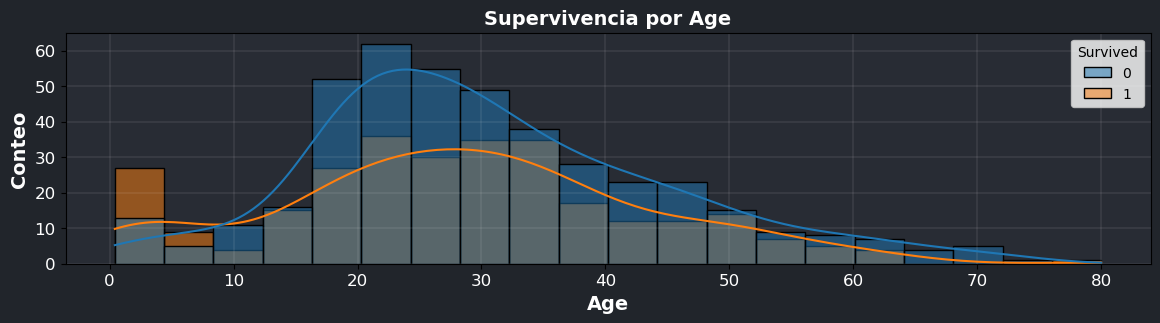

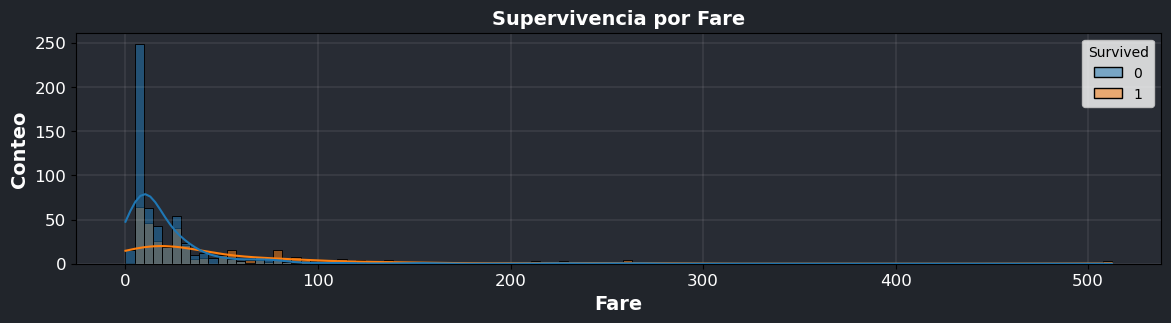

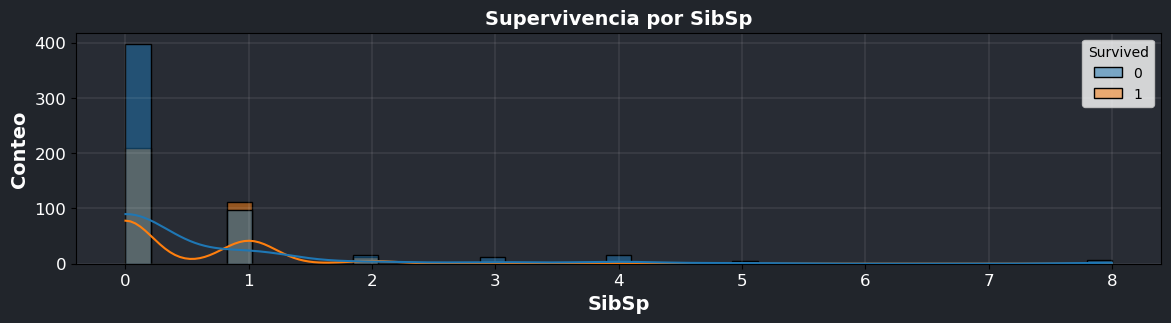

In [47]:
for i in variables:
    fig, ax = plt.subplots(figsize=(14, 3))
    plt.grid(visible=True, linewidth=0.1, color='white')
    fig.patch.set_facecolor('#21252b') 
    ax.set_facecolor('#282c34') 
    
    sns.histplot(data=titanic_train, x=f'{i}', hue='Survived', kde=True)

    plt.title(f'Supervivencia por {i}', color='white', fontsize=14, fontweight=1000)
    plt.xlabel(f'{i}', size=14, weight=700, color='white')
    plt.xticks(color='white', size=12)

    plt.ylabel('Conteo', size=14, weight=700, color='white')
    plt.yticks(color='white', size=12)
    
    plt.show()
    print('\n')

### **Limpieza de los datos**

In [88]:
titanic_train['Age'].fillna(titanic_train['Age'].mean(), inplace=True)
titanic_train['Embarked'].fillna('S', inplace=True)
titanic_train.drop('Cabin', axis=1, inplace=True)

In [92]:
titanic_train['Age'] = titanic_train['Age'].apply(lambda x: int(x))

## **Modelo**

### **Feture Engineering**

#### **Dummies**

In [93]:
X = titanic_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = titanic_train[['Survived']]

In [95]:
sex_dummies = pd.get_dummies(X['Sex']).reset_index()
embarked_dummies= pd.get_dummies(X['Embarked']).reset_index()

In [102]:
X = pd.merge(X.reset_index(), sex_dummies, how='left', left_on='index', right_on='index')
X = pd.merge(X, embarked_dummies, how='left', left_on='index', right_on='index')

In [105]:
X = X[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'C', 'Q']]

### **Entrenamiento del Modelo**

In [116]:
decision_tree = tree.DecisionTreeClassifier()

In [117]:
decision_tree.fit(X, y)

DecisionTreeClassifier()

In [122]:
fig, ax = plt.subplots(figsize=(100, 50), dpi=300)

tree.plot_tree(decision_tree, feature_names=X.columns, filled=True)

fig.savefig('tree.png')

### **Evaluación del Modelo**

In [125]:
cv_presicion = cross_val_score(decision_tree, X, y, cv=10)

In [130]:
f'La presición promedio es de {round(cv_presicion.mean()*100, 2)}%'

'La presición promedio es de 79.58%'